In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
# plot charts inline
%matplotlib inline

In [2]:
#read data
data=pd.read_csv('/Users/hankchen/Desktop/semester2/637/Final_project/medicare-skilled-nursing-facility-snf-provider-aggregate-report-cy-2015.csv')
data.head()

,Provider ID,Facility Name,Street Address,City,State,Zip Code,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,...,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with Hypertension,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,10022,CHEROKEE MEDICAL CENTER,400 NORTHWOOD DR,CENTRE,AL,35960,95,85,13.9,3787309,...,39.0,52.0,45.0,74.0,NaN,55.0,14.0,72.0,11.0,7.0
1,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,20,19,10.6,436623,...,NaN,21.0,53.0,58.0,NaN,74.0,16.0,63.0,16.0,21.0
2,10044,MARION REGIONAL MEDICAL CENTER,1256 MILITARY STREET SOUTH,HAMILTON,AL,35570,164,144,15.4,5906115,...,44.0,42.0,50.0,72.0,NaN,62.0,16.0,60.0,10.0,13.0
3,10045,FAYETTE MEDICAL CENTER,1653 TEMPLE AVENUE NORTH,FAYETTE,AL,35555,124,110,16.0,2748027,...,42.0,34.0,38.0,71.0,NaN,58.0,13.0,75.0,15.0,16.0
4,10058,BIBB MEDICAL CENTER,208 PIERSON AVE,CENTREVILLE,AL,35042,90,85,17.4,1679414,...,34.0,40.0,56.0,65.0,NaN,45.0,11.0,59.0,11.0,20.0


In [3]:
#check column type and missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15026 entries, 0 to 15025
Data columns (total 41 columns):
Provider ID                                             15026 non-null int64
Facility Name                                           15026 non-null object
Street Address                                          15026 non-null object
City                                                    15026 non-null object
State                                                   15026 non-null object
Zip Code                                                15026 non-null int64
Total Stays                                             15026 non-null int64
Distinct Beneficiaries Per Provider                     15026 non-null int64
Average Length of Stay (Days)                           15026 non-null float64
Total SNF Charge Amount                                 15026 non-null int64
Total SNF Medicare Allowed Amount                       15026 non-null int64
Total SNF Medicare Payment Amount     

In [4]:
#drop object column
data.drop(data.select_dtypes(['object']), inplace=True, axis=1)

In [5]:
#drop not important column
data.drop(['Provider ID', 'Zip Code' ],inplace=True, axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

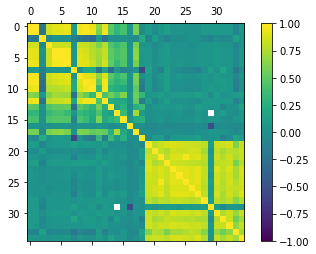

In [6]:
#plot correlation heatmap
correlations = data.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show

In [7]:
#drop columns which have too many missing value
data=data[data.columns[data.isnull().mean()<0.4]]

In [8]:
#check missing values
data.isnull().mean()

Total Stays                                             0.000000
Distinct Beneficiaries Per Provider                     0.000000
Average Length of Stay (Days)                           0.000000
Total SNF Charge Amount                                 0.000000
Total SNF Medicare Allowed Amount                       0.000000
Total SNF Medicare Payment Amount                       0.000000
Total SNF Medicare Standard Payment Amount              0.000000
Average Age                                             0.000000
Male Beneficiaries                                      0.104619
Female Beneficiaries                                    0.104619
Nondual Beneficiaries                                   0.187741
Dual Beneficiaries                                      0.187741
White Beneficiaries                                     0.025955
Asian Pacific Islander Beneficiaries                    0.366365
American Indian or Alaska Native Beneficiaries          0.239252
Average HCC Score        

In [9]:
#drop duplicate rows
data.drop_duplicates(keep='first')

,Total Stays,Distinct Beneficiaries Per Provider,Average Length of Stay (Days),Total SNF Charge Amount,Total SNF Medicare Allowed Amount,Total SNF Medicare Payment Amount,Total SNF Medicare Standard Payment Amount,Average Age,Male Beneficiaries,Female Beneficiaries,...,Percent of Beneficiaries with Chronic Kidney Disease,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,95,85,13.9,3787309,536155,514893,645028,78,32.0,53.0,...,51.00000,39.00000,52.00000,45.00000,74.00000,55.00000,14.00000,72.00000,11.00000,7.00000
1,20,19,10.6,436623,75762,75762,94249,82,NaN,NaN,...,47.00000,NaN,21.00000,53.00000,58.00000,74.00000,16.00000,63.00000,16.00000,21.00000
2,164,144,15.4,5906115,946310,913116,1142756,77,46.0,98.0,...,52.00000,44.00000,42.00000,50.00000,72.00000,62.00000,16.00000,60.00000,10.00000,13.00000
3,124,110,16.0,2748027,828039,807406,1006830,79,38.0,72.0,...,59.00000,42.00000,34.00000,38.00000,71.00000,58.00000,13.00000,75.00000,15.00000,16.00000
4,90,85,17.4,1679414,656639,604009,713803,76,35.0,50.0,...,59.00000,34.00000,40.00000,56.00000,65.00000,45.00000,11.00000,59.00000,11.00000,20.00000
5,47,43,11.9,904681,140626,138106,176613,80,17.0,26.0,...,70.00000,53.00000,51.00000,60.00000,NaN,65.00000,23.00000,NaN,5.00000,16.00000
6,96,87,13.9,1478730,371634,370216,465728,79,34.0,53.0,...,57.00000,33.00000,33.00000,39.00000,NaN,47.00000,14.00000,56.00000,7.00000,13.00000
7,50,44,11.8,628410,159749,140691,182772,77,17.0,27.0,...,32.00000,50.00000,50.00000,36.00000,64.00000,57.00000,7.00000,50.00000,14.00000,14.00000
8,72,68,12.3,3255908,300970,299395,373681,77,20.0,48.0,...,44.00000,38.00000,38.00000,50.00000,65.00000,56.00000,21.00000,63.00000,10.00000,10.00000
9,94,85,15.8,921870,637559,620234,718095,77,34.0,51.0,...,51.00000,39.00000,34.00000,49.00000,71.00000,48.00000,9.00000,NaN,9.00000,20.00000


In [10]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.87
to_drop = [column for column in upper.columns if any(upper[column] > 0.87)]

#drop highly correlated column
data.drop(to_drop,inplace=True, axis=1)

In [11]:
#drop Total Stays retain Average Length of Stay (Days) 
data.drop(['Total Stays'], inplace=True, axis=1)

In [12]:
#drop 'Asian Pacific Islander Beneficiaries' retain 'Dual Beneficiaries', 'American Indian or Alaska Native Beneficiaries'
data.drop(['Asian Pacific Islander Beneficiaries'], inplace=True, axis=1)

In [13]:
#drop highly correlated Beneficiaries
data.drop(['Percent of Beneficiaries with Atrial Fibrillation',"Percent of Beneficiaries with Alzheimer's",\
           'Percent of Beneficiaries with Asthma', 'Percent of Beneficiaries with Hyperlipidemia',\
           'Percent of Beneficiaries with Schizophrenia'], inplace=True, axis=1)

In [14]:
#fill NuLL value to 0
data=data.fillna(0)

In [15]:
#check statistic information
data.describe()

,Average Length of Stay (Days),Total SNF Charge Amount,Average Age,Dual Beneficiaries,American Indian or Alaska Native Beneficiaries,Average HCC Score,Percent of Beneficiaries with Osteoporosis
count,15026.000000,1.502600e+04,15026.000000,15026.000000,15026.000000,15026.000000,15026.000000
mean,27.601185,3.014493e+06,78.622854,44.550313,0.239851,2.459436,8.507567
std,7.182299,3.320673e+06,4.675007,43.239221,3.018474,0.607989,10.478277
min,1.800000,3.030100e+04,47.000000,0.000000,0.000000,0.600000,0.000000
25%,23.200000,1.027863e+06,76.000000,15.000000,0.000000,2.050000,0.167670
50%,27.200000,2.043838e+06,79.000000,36.000000,0.000000,2.360000,0.294120
75%,31.800000,3.820889e+06,82.000000,64.000000,0.000000,2.760000,17.000000
max,65.900000,9.818145e+07,92.000000,625.000000,119.000000,8.630000,65.000000


In [16]:
#drop 'American Indian or Alaska Native Beneficiaries' because 75% of the column are 0
data.drop(['American Indian or Alaska Native Beneficiaries'], inplace=True, axis=1)

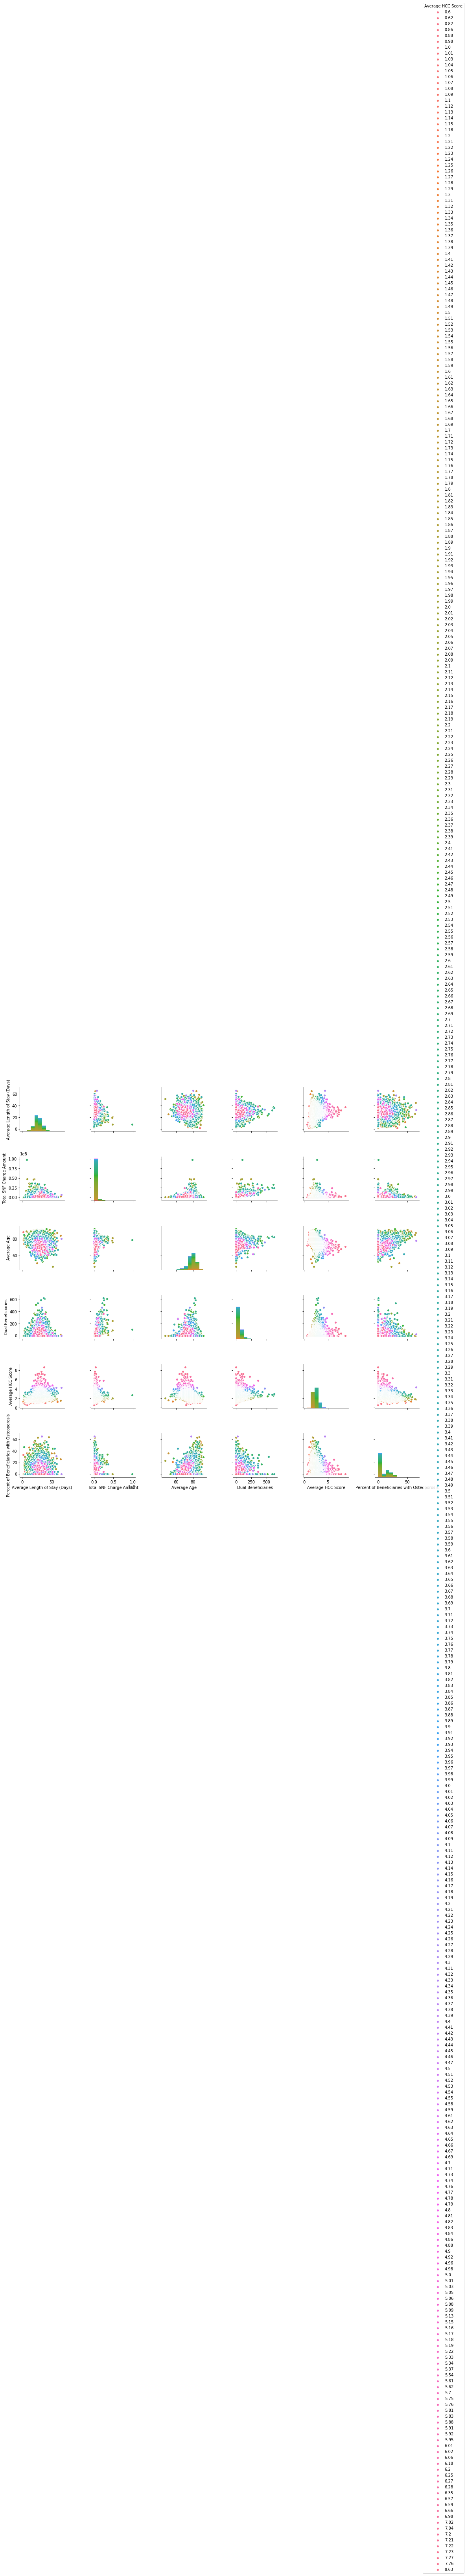

In [17]:
#correlation scatter plot
sns.pairplot(data, hue="Average HCC Score")

In [18]:
#detect outlier, calculate 'q1','q3','iqr','upper_limit','lower_limit'
q1=[]
q3=[]
iqr=[]
upper_limit=[]
lower_limit=[]
for i in range(len(data.columns)):
    Q1=data.iloc[:,i].quantile(0.25)
    Q3=data.iloc[:,i].quantile(0.75)
    IQR=Q3-Q1
    ul=Q3+(1.5*IQR)
    ll=Q1-(1.5*IQR)
    q1.append(Q1)
    q3.append(Q3)
    iqr.append(IQR)
    upper_limit.append(ul)
    lower_limit.append(ll)

df=pd.DataFrame(np.array([q1,q3,iqr,upper_limit,lower_limit]),index=['q1','q3','iqr','upper_limit','lower_limit'], columns=[data.columns])

In [19]:
#check 'q1','q3','iqr','upper_limit','lower_limit'
df

,Average Length of Stay (Days),Total SNF Charge Amount,Average Age,Dual Beneficiaries,Average HCC Score,Percent of Beneficiaries with Osteoporosis
q1,23.2,1027862.75,76.0,15.0,2.050,0.167670
q3,31.8,3820889.25,82.0,64.0,2.760,17.000000
iqr,8.6,2793026.50,6.0,49.0,0.710,16.832330
upper_limit,44.7,8010429.00,91.0,137.5,3.825,42.248495
lower_limit,10.3,-3161677.00,67.0,-58.5,0.985,-25.080825


In [20]:
#delete 'Dual Beneficiaries', 'Percent of Beneficiaries with Osteoporosis' outliers
DB_ul=float(df.loc[['upper_limit'],['Dual Beneficiaries']].values)
OPB_ul=float(df.loc[['upper_limit'],['Percent of Beneficiaries with Osteoporosis']].values)
DB_ll=float(df.loc[['lower_limit'],['Dual Beneficiaries']].values)
OPB_ll=float(df.loc[['lower_limit'],['Percent of Beneficiaries with Osteoporosis']].values)
for i in range(len(data)):
    if float(data.loc[i,['Dual Beneficiaries']].values)>DB_ul or \
    float(data.loc[i,['Dual Beneficiaries']].values)<DB_ll or \
    float(data.loc[i,['Percent of Beneficiaries with Osteoporosis']].values)>OPB_ul or \
    float(data.loc[i,['Percent of Beneficiaries with Osteoporosis']].values)<OPB_ll:
        data.drop([i], inplace=True, axis=0)
data=pd.DataFrame(data.values, columns=data.columns)

In [21]:
#normalized the data
mms=MinMaxScaler()
mms.fit(data)
data_scale=mms.transform(data)
data_scale=pd.DataFrame(data_scale, columns=data.columns)
data_scale

,Average Length of Stay (Days),Total SNF Charge Amount,Average Age,Dual Beneficiaries,Average HCC Score,Percent of Beneficiaries with Osteoporosis
0,0.188768,0.038278,0.688889,0.109489,0.138232,0.333333
1,0.137285,0.004140,0.777778,0.000000,0.178082,0.380952
2,0.212168,0.059865,0.666667,0.306569,0.161893,0.380952
3,0.221529,0.027689,0.711111,0.270073,0.138232,0.309524
4,0.243370,0.016802,0.644444,0.226277,0.204234,0.261905
5,0.157566,0.008909,0.733333,0.087591,0.145704,0.547619
6,0.188768,0.014757,0.711111,0.204380,0.117061,0.333333
7,0.156006,0.006094,0.666667,0.102190,0.145704,0.166667
8,0.163807,0.032864,0.666667,0.116788,0.163138,0.500000
9,0.218409,0.009084,0.666667,0.350365,0.151930,0.214286


In [22]:
#create label, divided the data into four parts by 1,2,3 quantile point for clustering target
label=[]
HCCq1=data['Average HCC Score'].quantile(0.25)
HCCq2=data['Average HCC Score'].quantile(0.5)
HCCq3=data['Average HCC Score'].quantile(0.75)
for i in range(len(data)):
    if data['Average HCC Score'][i]<HCCq1:
        label.append('low_risk')
    elif float(data['Average HCC Score'][i])>=HCCq1 and float(data['Average HCC Score'][i])<HCCq2:
        label.append('normal_risk')
    elif float(data['Average HCC Score'][i])>=HCCq2 and float(data['Average HCC Score'][i])<HCCq3:
        label.append('high_risk')
    else:
        label.append('danger_level')
data['label']=label


In [23]:
#create label1, divided the data into two parts for classification target
label1=[]
for i in range(len(data)):
    if data['Average HCC Score'][i]<HCCq2:
        label1.append(0)
    else:
        label1.append(1)
data['label1']=label1

In [24]:
# drop 'Average HCC Score' which is used for target cell
data.drop(['Average HCC Score'], inplace=True, axis=1)
data_scale.drop(['Average HCC Score'], inplace=True, axis=1)


In [25]:
# Elbow method to minimize within-cluster sum of square
Sum_of_squared_distances=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(data_scale)
    Sum_of_squared_distances.append(km.inertia_)

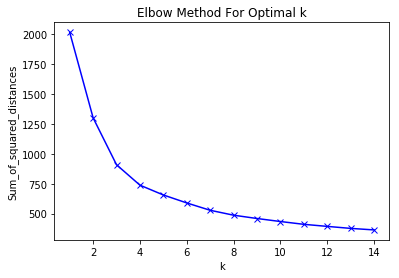

In [26]:
# plot Elbow curve by k, optimal k equal to 4
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
# fit clustering algorism and predict
clustering=KMeans(n_clusters=4, n_init=20)
y_predicted=clustering.fit_predict(data_scale)
data_scale['cluster']=y_predicted
data_scale.head()

,Average Length of Stay (Days),Total SNF Charge Amount,Average Age,Dual Beneficiaries,Percent of Beneficiaries with Osteoporosis,cluster
0,0.188768,0.038278,0.688889,0.109489,0.333333,3
1,0.137285,0.004140,0.777778,0.000000,0.380952,3
2,0.212168,0.059865,0.666667,0.306569,0.380952,3
3,0.221529,0.027689,0.711111,0.270073,0.309524,3
4,0.243370,0.016802,0.644444,0.226277,0.261905,0


Text(0,0.5,'Percent of Beneficiaries with Osteoporosis')

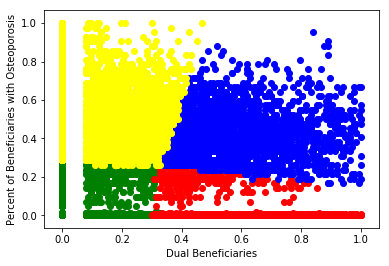

In [28]:

df1=data_scale[data_scale.cluster==0]
df2=data_scale[data_scale.cluster==1]
df3=data_scale[data_scale.cluster==2]
df4=data_scale[data_scale.cluster==3]

plt.scatter(df1['Dual Beneficiaries'],df1['Percent of Beneficiaries with Osteoporosis'],color='green')
plt.scatter(df2['Dual Beneficiaries'],df2['Percent of Beneficiaries with Osteoporosis'],color='red')
plt.scatter(df3['Dual Beneficiaries'],df3['Percent of Beneficiaries with Osteoporosis'],color='blue')
plt.scatter(df4['Dual Beneficiaries'],df4['Percent of Beneficiaries with Osteoporosis'],color='yellow')


plt.xlabel('Dual Beneficiaries')
plt.ylabel('Percent of Beneficiaries with Osteoporosis')

Text(0,0.5,'Percent of Beneficiaries with Osteoporosis')

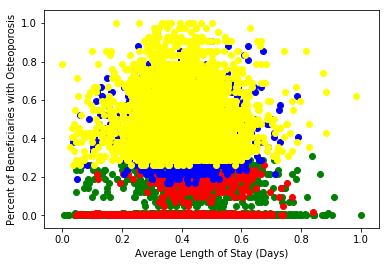

In [29]:
plt.scatter(df1['Average Length of Stay (Days)'],df1['Percent of Beneficiaries with Osteoporosis'],color='green')
plt.scatter(df2['Average Length of Stay (Days)'],df2['Percent of Beneficiaries with Osteoporosis'],color='red')
plt.scatter(df3['Average Length of Stay (Days)'],df3['Percent of Beneficiaries with Osteoporosis'],color='blue')
plt.scatter(df4['Average Length of Stay (Days)'],df4['Percent of Beneficiaries with Osteoporosis'],color='yellow')
plt.xlabel('Average Length of Stay (Days)')
plt.ylabel('Percent of Beneficiaries with Osteoporosis')

Text(0,0.5,'Percent of Beneficiaries with Osteoporosis')

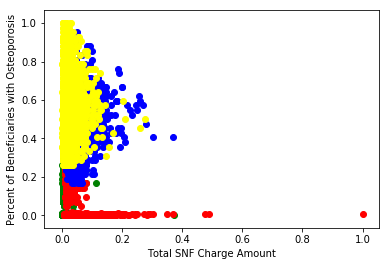

In [30]:
plt.scatter(df1['Total SNF Charge Amount'],df1['Percent of Beneficiaries with Osteoporosis'],color='green')
plt.scatter(df2['Total SNF Charge Amount'],df2['Percent of Beneficiaries with Osteoporosis'],color='red')
plt.scatter(df3['Total SNF Charge Amount'],df3['Percent of Beneficiaries with Osteoporosis'],color='blue')
plt.scatter(df4['Total SNF Charge Amount'],df4['Percent of Beneficiaries with Osteoporosis'],color='yellow')
plt.xlabel('Total SNF Charge Amount')
plt.ylabel('Percent of Beneficiaries with Osteoporosis')

Text(0,0.5,'Percent of Beneficiaries with Osteoporosis')

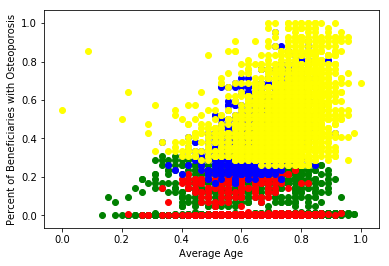

In [31]:
plt.scatter(df1['Average Age'],df1['Percent of Beneficiaries with Osteoporosis'],color='green')
plt.scatter(df2['Average Age'],df2['Percent of Beneficiaries with Osteoporosis'],color='red')
plt.scatter(df3['Average Age'],df3['Percent of Beneficiaries with Osteoporosis'],color='blue')
plt.scatter(df4['Average Age'],df4['Percent of Beneficiaries with Osteoporosis'],color='yellow')
plt.xlabel('Average Age')
plt.ylabel('Percent of Beneficiaries with Osteoporosis')

In [32]:
#check final version data
data.head()

,Average Length of Stay (Days),Total SNF Charge Amount,Average Age,Dual Beneficiaries,Percent of Beneficiaries with Osteoporosis,label,label1
0,13.9,3787309.0,78.0,15.0,14.0,low_risk,0
1,10.6,436623.0,82.0,0.0,16.0,low_risk,0
2,15.4,5906115.0,77.0,42.0,16.0,low_risk,0
3,16.0,2748027.0,79.0,37.0,13.0,low_risk,0
4,17.4,1679414.0,76.0,31.0,11.0,normal_risk,0


In [33]:
#check final version scaled data
data_scale.head()

,Average Length of Stay (Days),Total SNF Charge Amount,Average Age,Dual Beneficiaries,Percent of Beneficiaries with Osteoporosis,cluster
0,0.188768,0.038278,0.688889,0.109489,0.333333,3
1,0.137285,0.004140,0.777778,0.000000,0.380952,3
2,0.212168,0.059865,0.666667,0.306569,0.380952,3
3,0.221529,0.027689,0.711111,0.270073,0.309524,3
4,0.243370,0.016802,0.644444,0.226277,0.261905,0


In [34]:
#find each cluster's centroid
data_scale.groupby('cluster').mean()

,Average Length of Stay (Days),Total SNF Charge Amount,Average Age,Dual Beneficiaries,Percent of Beneficiaries with Osteoporosis
cluster,,,,,
0,0.410735,0.016185,0.704446,0.123572,0.028952
1,0.406674,0.042638,0.674025,0.506882,0.017442
2,0.388124,0.047780,0.686249,0.577170,0.424803
3,0.391260,0.019432,0.743509,0.156625,0.512155


In [35]:
#create confusion matrix
confusion_df = pd.DataFrame(list(zip(data["label"].values, data_scale["cluster"].values)),\
                            columns = ["label", "cluster"])
pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)

label,danger_level,high_risk,low_risk,normal_risk
cluster,,,,
0,1279,1159,1733,1410
1,1268,1048,309,706
2,730,762,226,563
3,418,640,1304,927


In [36]:
#get acuracy
cluster_dict={0:'high_risk', \
              1:"normal_risk",\
              2:'danger_level',\
              3:'low_risk'}

predicted_target=[cluster_dict[i] \
                  for i in y_predicted]

print(metrics.classification_report(data["label"], predicted_target))

              precision    recall  f1-score   support

danger_level       0.32      0.20      0.24      3695
   high_risk       0.21      0.32      0.25      3609
    low_risk       0.40      0.37      0.38      3572
 normal_risk       0.21      0.20      0.20      3606

   micro avg       0.27      0.27      0.27     14482
   macro avg       0.28      0.27      0.27     14482
weighted avg       0.28      0.27      0.27     14482



# classification

In [37]:
#add target cell to scaled data
data_scale['label']=label1

In [38]:
#split scaled data into 0.7 training and 0.3 testing data
X_train, X_test, y_train, y_test = train_test_split(data_scale.iloc[:,:-2], \
                                                    data_scale["label"], test_size=0.3, random_state=0)

In [39]:
#Naive Bayes model and model's accuracy
metrics = ["f1_macro", 'roc_auc']

clf = MultinomialNB()

cv = cross_validate(clf, data_scale.iloc[:,:-2], data_scale["label"], \
                    scoring=metrics, cv=5)
print("\nTest data set average f1 score:")
print(cv['test_f1_macro'].mean())
print("\nTest data set average auc:")
print(cv['test_roc_auc'].mean())



Test data set average f1 score:
0.6197032259584737

Test data set average auc:
0.7279020608784498


In [40]:
#SVM model and model's accuracy
metrics = ["f1_macro", 'roc_auc']

clf = svm.LinearSVC()

cv = cross_validate(clf, data_scale.iloc[:,:-2], data_scale["label"], \
                    scoring=metrics, cv=5)
print("\nTest data set average f1 score:")
print(cv['test_f1_macro'].mean())
print("\nTest data set average auc:")
print(cv['test_roc_auc'].mean())


Test data set average f1 score:
0.7554698840987291

Test data set average auc:
0.8334285248754447


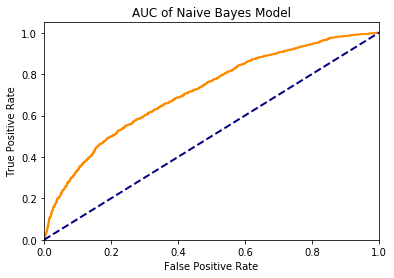

In [41]:
# Naive Bayes ROC curve
clf = MultinomialNB()
clf=clf.fit(X_train, y_train)
predict_p=clf.predict_proba(X_test)

y_pred = predict_p[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred, \
                                 pos_label=1)

plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of Naive Bayes Model');
plt.show();

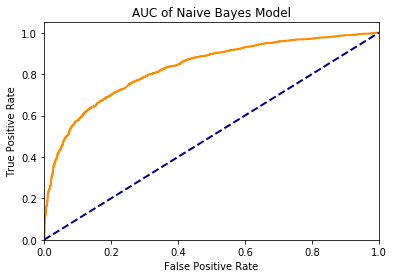

In [42]:
#SVM ROC curve
clf = svm.SVC(kernel='linear', probability=True)
clf=clf.fit(X_train, y_train)
predict_p=clf.predict_proba(X_test)
y_pred = predict_p[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred, \
                                 pos_label=1)

plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of Naive Bayes Model');
plt.show();